In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

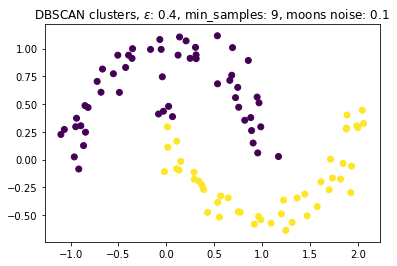

In [2]:
from sklearn.cluster import DBSCAN
noise = 0.1
X, y = make_moons(n_samples=100, noise=noise, random_state=0)
eps = 0.4
min_samples = 9
dbs = DBSCAN(eps=eps, # critical to set for each individual problem
             min_samples=min_samples,
             metric='euclidean', # distance metric to use, directly affects eps, can also use precomputed
                                 # X is then assumed to be distance between data points
             metric_params=None,
             algorithm='auto',
             leaf_size=30,
             p=None, # minkowski metric power to use for distances, if applicable
             n_jobs=None
            )
plt.scatter(X[:, 0], X[:, 1], c=dbs.fit_predict(X))
plt.title(f'DBSCAN clusters, $\epsilon$: {eps}, min_samples: {min_samples}, moons noise: {noise}')
plt.show()

In [3]:
print(dbs.core_sample_indices_.shape) # indicies of core samples in training dataset
print(dbs.components_.shape) # core samples found through training
print(dbs.labels_.shape) # labels for each data point, noisy values are given the value -1

(90,)
(90, 2)
(100,)


In [4]:
# note for DBSCAN we don't have predict method
# if new data comes in, new data could be bridges between clusters which would invalidate our 
# previous results and if we re-run we would get new clusters


# If we want to break this condition though we can make predictions by making some assumptions
# Based on the assumption we want to ues to propagate labels, we can use different assignment algorithms
# We can, for example, train classification algorithms to then do the cluster assignment for us. For this we can 
# use all data, only the core samples, or a different processed version depending on the final goal